<a href="https://colab.research.google.com/github/Somu112/Machine-Learning/blob/main/Employee_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Wed Oct 13 12:01:14 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8    28W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install shap

In [3]:
!pip install pycaret

In [4]:
!wget https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv


--2021-10-13 12:01:23--  https://www.dropbox.com/s/d18ektpwkx91khj/employee_data.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/d18ektpwkx91khj/employee_data.csv [following]
--2021-10-13 12:01:24--  https://www.dropbox.com/s/raw/d18ektpwkx91khj/employee_data.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc63da8c9ce5c1ab809a7e953de8.dl.dropboxusercontent.com/cd/0/inline/BX9smiG_aO7-oZcKnD4affi6q2YFlyc90yZLS2vMz9KnpORi5ZcmA4O3fNX0MPzoxjJsLjoq_Py0w0JQpx7u9N6Fuh8QFQcGiiwaWBrcIUhH6QITlzUPiUd5WFGdpoPwQ1SjUmop2E3K2R6GMvIyqFou/file# [following]
--2021-10-13 12:01:24--  https://uc63da8c9ce5c1ab809a7e953de8.dl.dropboxusercontent.com/cd/0/inline/BX9smiG_aO7-oZcKnD4affi6q2YFlyc90yZLS2vMz9KnpORi5ZcmA4O3fNX0MPzoxjJsLjoq

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
import os

print("library imported")

library imported


In [6]:
df = pd.read_csv("employee_data.csv")

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
import plotly.express as px
fig = px.histogram(df, x = 'average_montly_hours')
fig.show()

In [8]:
fig = px.histogram(df, x = 'satisfaction_level')
fig.show()

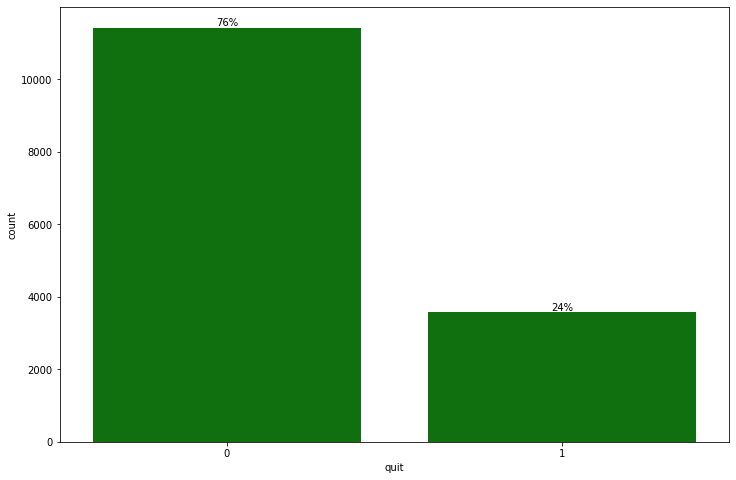

In [9]:
plt.figure(figsize=(12,8))

ax = sns.countplot(df['quit'], color='green')
for p in ax.patches:
  x = p.get_bbox().get_points()[:,0]

  y = p.get_bbox().get_points()[1,1]

  ax.annotate('{:.2g}%'.format(100.*y/len(df)), (x.mean(), y), ha='center', va='bottom')
plt.show()

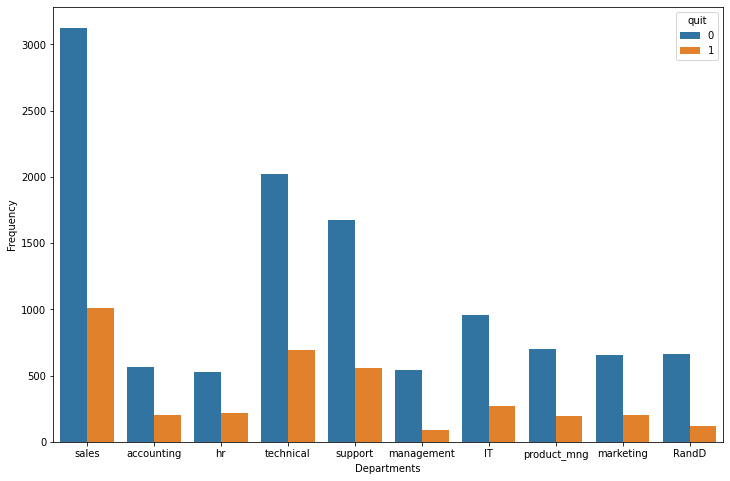

In [10]:
plt.figure(figsize=(12,8))

sns.countplot(data=df,x=df['department'],hue='quit')

plt.xlabel('Departments')
plt.ylabel('Frequency')

plt.show()

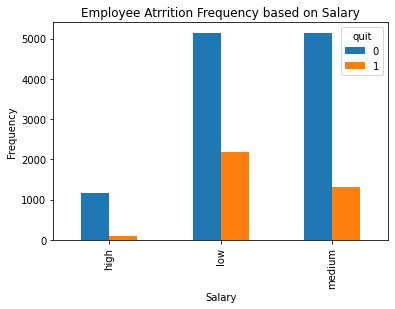

In [11]:
df_new = pd.crosstab(df['salary'], df['quit'])
df_new.plot(kind='bar')
plt.title("Employee Atrrition Frequency based on Salary")
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.show()

In [12]:
px.scatter(df, x=df['satisfaction_level'], y=df['time_spend_company'],color=df['quit'])

In [13]:
fig = px.box(df, x="department",y='number_project')
fig.show()

**Create Training and Testing Set**

In [14]:
X = df.drop('quit', axis=1)
y = df.quit

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size=0.2,stratify=y)

In [16]:
cat_vars = ['department', 'salary']

for vars in cat_vars:
  cat_list = pd.get_dummies(X_train[vars], prefix=vars)
  X_train = X_train.join(cat_list)

In [17]:
cat_vars = ['department', 'salary']

for vars in cat_vars:
  cat_list = pd.get_dummies(X_test[vars], prefix=vars)
  X_test = X_test.join(cat_list)

In [18]:
X_train.drop(columns=['department', 'salary'], axis=1, inplace=True)
X_train.shape

(11999, 20)

In [19]:
X_test.drop(columns=['department', 'salary'], axis=1, inplace=True)
X_test.shape

(3000, 20)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from ipywidgets import interactive, IntSlider, FloatSlider, interact
import ipywidgets
from IPython.display import Image
from subprocess import call
import matplotlib.image as mpimg

In [21]:
@interact #To convert any function into an inteactive one just write "@interact" immediately before the function definition

def plot_tree(
    crit = ['gini', 'entropy'],
    split = ['best','random'],
    depth = IntSlider(min = 1, max = 25, value =2, continuous_update = False),
    min_split = IntSlider(min = 1, max = 5, value =2, continuous_update = False),
    #min_split is the minimum number of samples  required to split an internal node in our decision tree
    min_leaf = IntSlider(min = 1, max = 5, value =1, continuous_update = False)):
  
  estimator = DecisionTreeClassifier(criterion=crit,
                                     splitter=split,
                                     max_depth = depth,
                                     min_samples_split = min_split,
                                     min_samples_leaf = min_leaf
                                     )
  estimator.fit(X_train, y_train)
  print('Decision Tree Training Accuracy:', accuracy_score(y_train, estimator.predict(X_train)))
  print('Decision Tree Testing Accuracy:', accuracy_score(y_test, estimator.predict(X_test)))

  a = accuracy_score(y_train, estimator.predict(X_train))
  b = accuracy_score(y_test, estimator.predict(X_test))

  if a > 0.99:
    print('Decision Tree Training Accuracy',a, 'Decision Tree Testing Accuracy', b)
    print('Criterion:',crit,'\n', 'Split:', split,'\n', 'Depth:', depth,'\n', 'Min_split:', min_split,'\n', 'Min_leaf:', min_leaf,'\n')

  #Let us use GraphViz to export the model and display it as an image on the screen
  graph = Source(tree.export_graphviz(estimator, out_file=None, 
                                      feature_names = X_train.columns,
                                      class_names = ['stayed', 'quit'],
                                      filled = True))
  
  display(Image(data=graph.pipe(format = 'png')))
  

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

In [22]:
@interact
def plot_tree_rf(crit= ['gini','entropy'],
                 bootstrap= ['True', 'False'],
                 depth=IntSlider(min= 1 ,max= 20,value=3, continuous_update=False),
                 forests=IntSlider(min= 1,max= 1000,value= 100,continuous_update=False),
                 min_split=IntSlider(min= 2,max= 5,value= 2, continuous_update=False),
                 min_leaf=IntSlider(min= 1,max= 5,value= 1, continuous_update=False)):
  
  estimator = RandomForestClassifier(
      random_state = 1,
      criterion = crit,
      bootstrap = bootstrap,
      n_estimators = forests,
      max_depth = depth, 
      min_samples_split = min_split,
      min_samples_leaf = min_leaf,
      n_jobs = -1,
      verbose = False)
  
  estimator.fit(X_train, y_train)

  print('Random Forest Training Accuracy:', accuracy_score(y_train, estimator.predict(X_train)))
  print('Random Forest Testing Accuracy:', accuracy_score(y_test, estimator.predict(X_test)))  

  a = accuracy_score(y_train, estimator.predict(X_train))
  b = accuracy_score(y_test, estimator.predict(X_test))

  if a > 0.99:
    print('Random Forest Training Accuracy',a, 'Random Forest Testing Accuracy', b)
    print('Criterion:',crit,'\n', 'Bootstrap:', bootstrap,'\n', 'Depth:', depth,'\n', 'forests:', forests,'\n', 'Min_split:', min_split,'\n', 'Min_leaf:', min_leaf,'\n')


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Advantages & Disadvantages** of Decision Tree:

**Advantages:**

* Interpretable and easy to understand
* Can Handle Missing Values
* Feature Selection happens automatically

**Disadvantages:**

* Prone to overfitting
* Tends to add High Variance which means they tend to overfit
* Small changes in data greatly affect prediction

**One problem with Decision Tree is that they have Low Bias and High Variance which means they are prone to overfitting on the training set**

Now, let us see what **Underfit**, **Goodfit**, and **Overfit** is:

* **Underfit**

  * Model has not learned anything
  * Training Accuracy: 54%
  * Testing Accuracy: 49%

* **Overfit**

  * Model has memorized everything
  * Training Accuracy: 99%
  * Testing Accuracy: 46%

* **Goodfit**

  * Model has performed well on the testing data as well alongwith the training data
  * Training Accuracy: 93%
  * Testing Accuracy: 91%

Now, let's use a Random Forest Classifier to overcome the variance problem to get a better generalizable result

In [23]:
@interact
def plot_tree_rf(crit= ['gini','entropy'],
                 bootstrap= ['True', 'False'],
                 depth=IntSlider(min= 1 ,max= 20,value=3, continuous_update=False),
                 forests=IntSlider(min= 1,max= 1000,value= 100,continuous_update=False),
                 min_split=IntSlider(min= 2,max= 5,value= 2, continuous_update=False),
                 min_leaf=IntSlider(min= 1,max= 5,value= 1, continuous_update=False)):
  
  estimator = RandomForestClassifier(
      random_state = 1,
      criterion = crit,
      bootstrap = bootstrap,
      n_estimators = forests,
      max_depth = depth, 
      min_samples_split = min_split,
      min_samples_leaf = min_leaf,
      n_jobs = -1,
      verbose = False)
  
  estimator.fit(X_train, y_train)

  print('Random Forest Training Accuracy:', accuracy_score(y_train, estimator.predict(X_train)))
  print('Random Forest Testing Accuracy:', accuracy_score(y_test, estimator.predict(X_test)))  

  a = accuracy_score(y_train, estimator.predict(X_train))
  b = accuracy_score(y_test, estimator.predict(X_test))

  if a > 0.99:
    print('Random Forest Training Accuracy',a, 'Random Forest Testing Accuracy', b)
    print('Criterion:',crit,'\n', 'Bootstrap:', bootstrap,'\n', 'Depth:', depth,'\n', 'forests:', forests,'\n', 'Min_split:', min_split,'\n', 'Min_leaf:', min_leaf,'\n')


interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

**Advantages & Disadvantages** of Random Forest:

**Advantages:**

* Not prone overfitting
* Runs efficiently huge data sets
* Gives better accuracy than other classification algorithms

**Disadvantages:**

* Computationally Slower
* Found to be biased while dealing with categorical variables
* Although much lower than decision trees, overfitting is still a risk with random forests

# **Implement GridSearchCV and RandomizedSearchCV Model

**GridSearchCV**

In [24]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=-1, verbose=3)
CV_rfc.fit(X_train, y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             verbose=3)

In [25]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [26]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=6, criterion='entropy')

In [27]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200,
                       random_state=42)

In [28]:
pred = rfc1.predict(X_test)

In [29]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.966


In [30]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
gd_roc=roc_auc_score(y_test, pred)
gd_acc = accuracy_score(y_test, pred)
gd_prec = precision_score(y_test, pred)
gd_rec = recall_score(y_test, pred)
gd_f1 = f1_score(y_test, pred)

**RandomizedSearchCV**

In [31]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [32]:
#Base Model
rfc=RandomForestClassifier(random_state=42)
rf_random = RandomizedSearchCV(estimator = rfc, 
                               param_distributions = random_grid, 
                               n_iter = 10,
                               cv = 3, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [33]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 2000}

In [34]:
rfc1=RandomForestClassifier(random_state=42, bootstrap = False,
 max_depth = 70,
 max_features= 'sqrt',
 min_samples_leaf = 1,
 min_samples_split= 5,
 n_estimators= 1600)


In [35]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=70, max_features='sqrt',
                       min_samples_split=5, n_estimators=1600, random_state=42)

In [36]:
pred = rfc1.predict(X_test)

# Model Evaluation
**Accuracy**: No. of correct predictions made by the model over all kinds predictions made

**When to use Accuracy:**

Accuracy is a good measure when the target variable classes in the data are nearly balanced. For example, No. of people who Survived Titanic (60% yes - 40% no)

1
print("Accuracy: ",accuracy_score

In [37]:
print("Accuracy: ", accuracy_score(y_test,pred))

Accuracy:  0.992


**Confusion Matrix**: Gives the Performance of a classification model on a set of test data for which the true values are known.

A way to visualize **Precision and Recall**

**When to use Confusion Matrix:** When we have an Imbalanced Classification Task

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[2284,    2],
       [  22,  692]])

* **Precision:**

  * What percebtage of positive predictions made were correct? This is Precision
  * No. of True Positives divided by the no. of True Positives plus the No. of False Positives

* **Recall:** Ratio of True Positives to all the positives in your Dataset

* **When to use Precision & Recall:**

  * In the credit card fraud detection task, lets say we modify the model slightly, and identify a single transaction correctly as fraud.

  * Now, our precision will be 1.0 (no false positives) but our recall will be very low because we will still have many false negatives.

  * If we go to the other extreme and classify all transactions as fraud, we will have a recall of 1.0 — we’ll catch every fraud transaction — but our precision will be very low and we’ll misclassify many legit transactions. In other words, as we increase precision we decrease recall and vice-versa.

* **F1-Score:** F1 Score is the weighted average of Precision and Recall. F1 is usually more useful than accuracy, especially when we have an uneven class distribution

* **When to use F1-Score:**
    * Useful when you have data with imbalance classes
    * Let us say, we have a model with a precision of 1, and recall of 0 which gives a simple average as 0.5 and an F1 score of 0
    * If one of the parameters is low, the second one no longer matters in the F1 score
    * The F1 score favors classifiers that have similar precision and recall
    * F1 score is a better measure to use if you are seeking a balance between Precision and Recall

In [39]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc=roc_auc_score(y_test, pred)
acc = accuracy_score(y_test, pred)
prec = precision_score(y_test, pred)
rec = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

results = pd.DataFrame([['RandomizedSearchCV', acc,prec,rec, f1,roc], 
                        ['GridSearchCV',gd_acc, gd_prec, gd_rec, gd_f1, gd_roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,RandomizedSearchCV,0.992,0.997118,0.969188,0.982955,0.984156
1,GridSearchCV,0.966,0.985714,0.869748,0.924107,0.932905


In [40]:
import pickle 

filename = 'final_model.sav'

pickle.dump(rfc1, open(filename, 'wb'))
 

In [41]:
import shap

In [ ]:
shap_values = shap.TreeExplainer(rfc1).shap_values(X_train)
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap.dependence_plot('satisfaction', shap_values, X_train)

# **PyCaret**
Use PyCaret to find the best model and perform Automatic Hyperparameter tuning

**NOTE:** It is alwasy used in Industry as a Directional Tool

**PyCaret** is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment

Click Here! to learn more about PyCaret

**Installing PyCaret**

* !pip install pycaret
####Tasks to be performed

* Import PyCaret and load the data set
* Initialize or setup the environment
* Compare Multiple Models and their Accuracy Metrics
* Create the model
* Tune the model
* Evaluate the model

**Import PyCaret and load the data set**

In [ ]:
# import all classifiers
import pycaret.classification as pc

# check all available options. 
dir(pc)

In [ ]:
#Loading the dataset
import pandas as pd
df = pd.read_csv('employee_data.csv')
df.head() #Printing the first 5 rows of dataframe

In [ ]:
df['department'].unique()

#### **Initialize or setup the environment**

In [ ]:
pc.setup(df, target='quit')

**Observations:**

* The target type (Serial No. 2) is Binary because we have two values in quit column i.e., 0 and 1
* The data contains 3 Numeric Features and 6 Categorical Features


**Compare Multiple Models and their Accuracy Metrics**